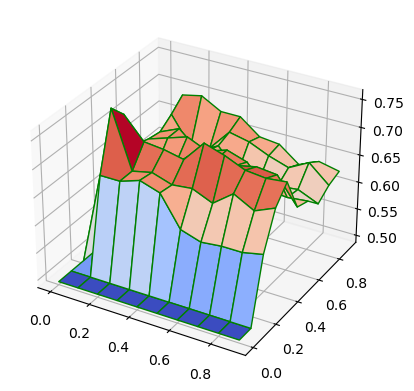

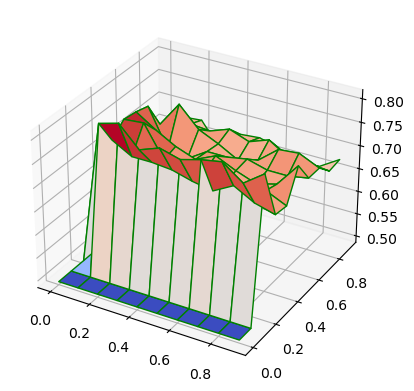

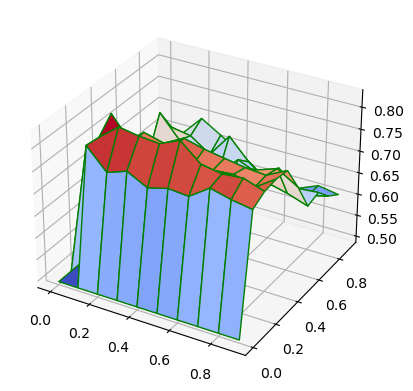

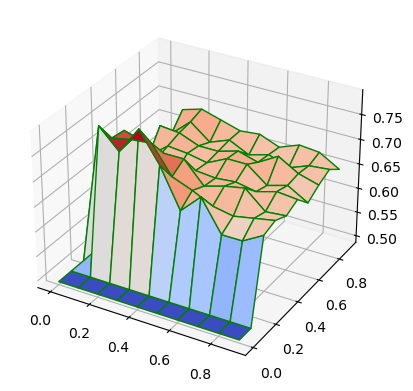

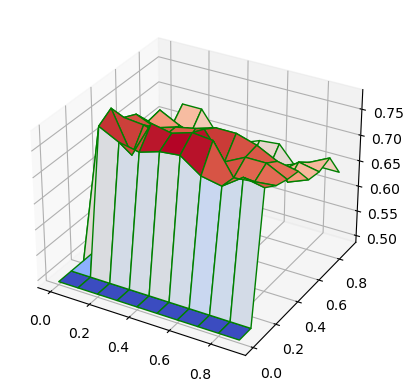

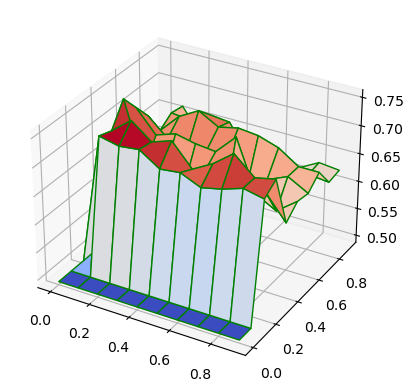

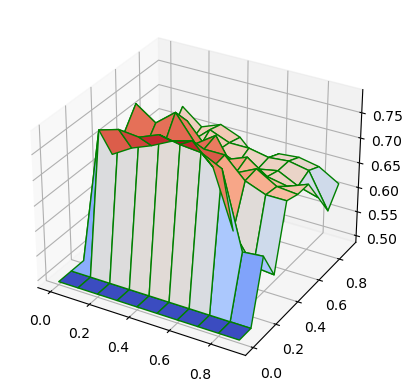

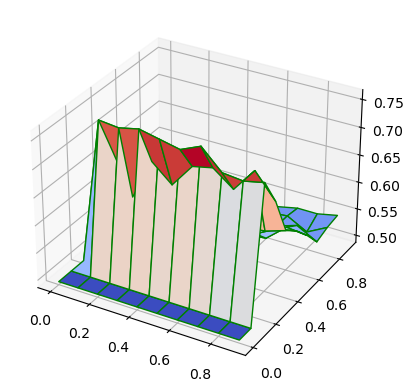

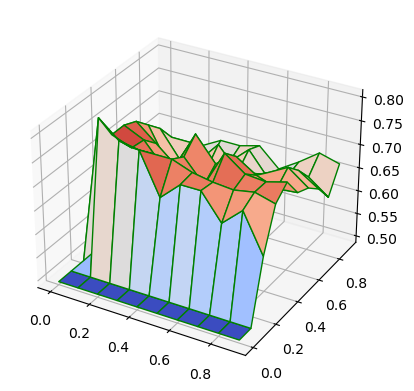

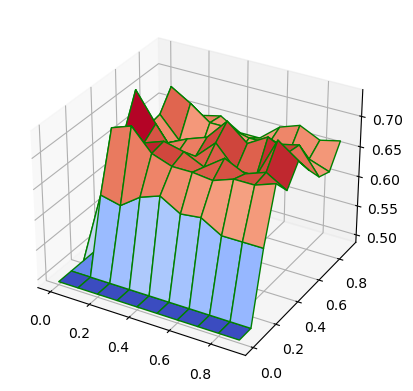

In [11]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input50sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2']*100, cmap ='coolwarm', edgecolor ='green')
    fig.savefig("3d_plot_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [12]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.00492188, 0.00492188, 0.00492188, 0.00492188, 0.00492188,
        0.00492188, 0.00492188, 0.00492188, 0.00492188, 0.00492188],
       [0.00492188, 0.00522266, 0.00517578, 0.00519141, 0.00516797,
        0.00517969, 0.00517578, 0.00520703, 0.00519531, 0.0051875 ],
       [0.00492188, 0.00746484, 0.00741016, 0.00744141, 0.00730469,
        0.00719141, 0.00716406, 0.00697656, 0.006875  , 0.00683594],
       [0.00492188, 0.00741016, 0.00713281, 0.00722656, 0.00716016,
        0.00712891, 0.0070625 , 0.00694531, 0.00685937, 0.00686719],
       [0.00492188, 0.00722656, 0.00703516, 0.00689063, 0.0069375 ,
        0.00695312, 0.00692188, 0.00689453, 0.00687109, 0.00682422],
       [0.00492188, 0.00701953, 0.00679688, 0.00680859, 0.00684766,
        0.00688281, 0.00678906, 0.00673438, 0.00677734, 0.00675391],
       [0.00492188, 0.00670312, 0.00655078, 0.00667188, 0.0065625 ,
        0.00659375, 0.00660156, 0.0065625 , 0.00656641, 0.00649609],
       [0.00492188, 0.00666406, 0.0066171

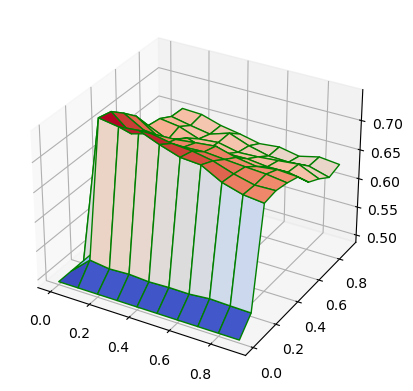

In [13]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples*100, cmap ='coolwarm', edgecolor ='green')
fig.savefig("average_accuracy_grid_over_10_samples.png".format(sample))

In [14]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [15]:
best_w1_w2

(2, 1)

In [16]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [17]:
average_accuracy_grid_10_by_10_10_samples[2]

array([0.00492188, 0.00746484, 0.00741016, 0.00744141, 0.00730469,
       0.00719141, 0.00716406, 0.00697656, 0.006875  , 0.00683594])

In [18]:
average_accuracy_grid_10_by_10_10_samples[:,1]

array([0.00492188, 0.00522266, 0.00746484, 0.00741016, 0.00722656,
       0.00701953, 0.00670312, 0.00666406, 0.00654297, 0.00652734])

In [19]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[2]*100)
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,1]*100)

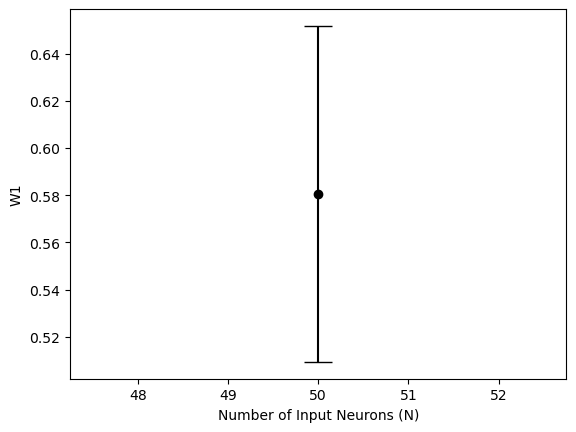

In [20]:
fig, ax = plt.subplots()
ax.scatter(50, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(50, array_best_w1_best_w2[0]/0.3445, std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input50forW1.png")

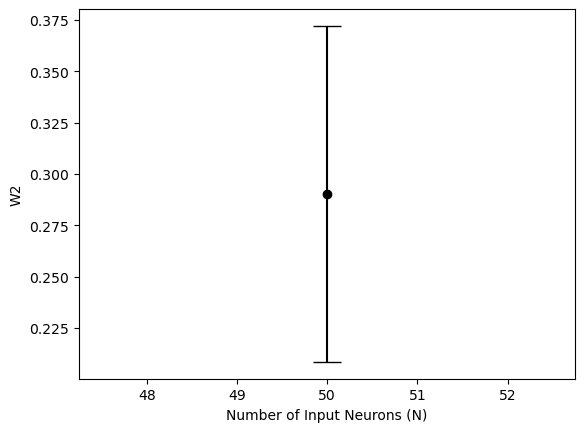

In [21]:
fig2, ax2 = plt.subplots()
ax2.scatter(50, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(50, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input50forW2.png")

In [22]:
data = {}
data['N'] = 50
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("50_input_neurons_w1_w2.npz",**data)